In [1]:
#biblioteki i funkcje
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import winsound

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,LSTM #,advanced_activations,
from keras.activations import relu, elu, sigmoid
from keras.optimizers import Adam, Nadam, RMSprop, Adagrad, Adadelta
from keras.callbacks import ModelCheckpoint,EarlyStopping

import datetime as dt 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

def write(frame,name):
    writer=pd.ExcelWriter(name+'.xlsx')
    frame.to_excel(writer)
    writer.close()
    #writer.save()

C:\Users\Filip\AppData\Local\Temp\ipykernel_20536\1694521312.py:15: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
#wczytywanie przykładowej ramki danych
data=pd.read_excel('df_ex.xlsx')

#Nomalizacja zmiennych
data['A']=data['A']/100
data['B']=data['B']/100
data['Res']=data['Res']/10000

#podział danych na treningowe/walidaycjne/testowe
df_tr_in=data.loc[0:74,['A','B']]
df_val_in=data.loc[75:100,['A','B']]
df_test_in=data.loc[101:200,['A','B']]

df_tr_out=data.loc[0:74,'Res']
df_val_out=data.loc[75:100,'Res']
df_test_out=data.loc[101:200,'Res']

#przeformatowanie danych na postać macierzy 3D do lstm
tr_samples_num=len(df_tr_in)
in_tr=df_tr_in.values.reshape(tr_samples_num,1,len(df_tr_in.columns)) #najpierw liczba próbek, potem liczba wierszy, potem kolumn
out_tr=df_tr_out.values.reshape(tr_samples_num,1,1)

val_samples_num=len(df_val_in)
in_val=df_val_in.values.reshape(val_samples_num,1,len(df_val_in.columns)) #najpierw liczba próbek, potem liczba wierszy, potem kolumn
out_val=df_val_out.values.reshape(val_samples_num,1,1)

test_samples_num=len(df_test_in)
in_test=df_test_in.values.reshape(test_samples_num,1,len(df_test_in.columns)) #najpierw liczba próbek, potem liczba wierszy, potem kolumn
out_test=df_test_out.values.reshape(test_samples_num,1,1)

In [3]:
data

,A,B,Res
0,0.90,0.49,0.4410
1,0.09,0.90,0.0810
2,0.59,0.73,0.4307
3,0.35,0.74,0.2590
4,0.75,0.08,0.0600
...,...,...,...
195,0.30,0.38,0.1140
196,0.90,0.88,0.7920
197,0.11,0.11,0.0121
198,0.05,0.56,0.0280


In [5]:
in_tr

array([[[0.9 , 0.49]],

       [[0.09, 0.9 ]],

       [[0.59, 0.73]],

       [[0.35, 0.74]],

       [[0.75, 0.08]],

       [[0.96, 0.92]],

       [[0.01, 0.31]],

       [[0.33, 0.43]],

       [[0.95, 0.61]],

       [[0.4 , 0.61]],

       [[0.36, 0.21]],

       [[0.35, 0.49]],

       [[0.91, 0.92]],

       [[0.86, 0.21]],

       [[0.06, 0.25]],

       [[0.24, 0.36]],

       [[0.98, 0.35]],

       [[0.76, 0.9 ]],

       [[0.22, 0.41]],

       [[0.45, 0.42]],

       [[0.57, 0.28]],

       [[0.64, 0.18]],

       [[0.32, 0.56]],

       [[0.  , 0.22]],

       [[0.91, 0.24]],

       [[0.89, 0.92]],

       [[0.1 , 0.91]],

       [[0.58, 0.09]],

       [[0.91, 0.09]],

       [[0.84, 0.04]],

       [[0.84, 0.71]],

       [[0.54, 0.12]],

       [[0.54, 0.82]],

       [[0.48, 0.75]],

       [[0.49, 0.6 ]],

       [[0.7 , 0.27]],

       [[0.85, 0.66]],

       [[0.16, 0.24]],

       [[0.57, 0.69]],

       [[0.03, 0.04]],

       [[0.6 , 0.83]],

       [[0.73, 0

C:\Users\Filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\Filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.2643 - val_loss: 0.2848
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 0.2621 - val_loss: 0.2826
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 0.2601 - val_loss: 0.2805
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - loss: 0.2581 - val_loss: 0.2783
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - loss: 0.2561 - val_loss: 0.2762
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 0.2541 - val_loss: 0.2740
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.2523 - val_loss: 0.2719
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.2505 - val_loss: 0.2697
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.2487 - val_loss: 0.2676
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.2470 - val_loss: 0.2655
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.2453 - val_loss: 0.2634
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.24

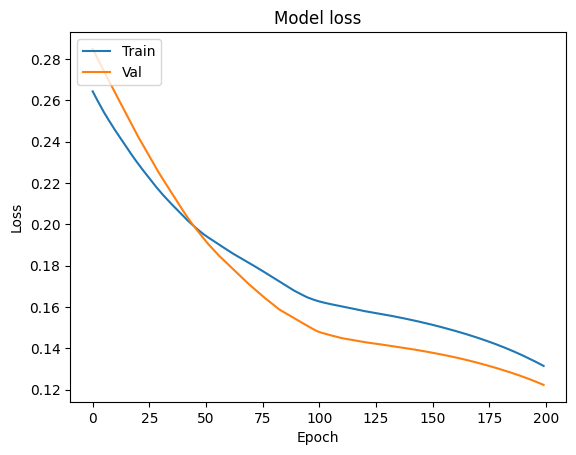

CPU times: total: 42.7 s
Wall time: 41.8 s


In [4]:
%%time
# manualne lstm

#model
model = Sequential()
#(timesteps, data_dim)
model.add(LSTM(8,return_sequences=True, input_shape=(in_tr.shape[1],in_tr.shape[2]),activation='tanh'))
#model.add(Dropout(0.8))
#model.add(Dense(10, activation='relu'))
model.add(LSTM(4,return_sequences=True,activation='tanh'))
#model.add(LSTM(3,return_sequences=True,activation='sigmoid'))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

#opt=  Adam(lr=1e-4, decay=1e-5)
#sgd = SGD(lr=0.001, clipvalue=0.5,nesterov=True,momentum=0.8,clipnorm=1.0)
#opt = SGD(lr=0.001, decay=1e-6, momentum=0.8, nesterov=True)
#opt = Adagrad(lr=0.01, epsilon=1e-6, decay=0.0) #ładny wykres loss, mae ~0.115
#opt = RMSprop(lr=0.001, rho=0.9, epsilon=1e-6)
#opt =Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)

#learning_rate zamiast lr
opt= Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, decay=0.0001, amsgrad=True)
#opt= Nadam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
#opt=Ftrl(lr=0.001,learning_rate_power=-0.5,initial_accumulator_value=0.1,l1_regularization_strength=0.0,l2_regularization_strength=0.0,l2_shrinkage_regularization_strength=0.0,)
model.compile(loss='mae',optimizer=opt)

pat=20
epo=200

early_stopping =EarlyStopping(monitor='val_loss', patience=pat)
#instrukja uczenia modelu
history=model.fit(in_tr, out_tr,validation_data=[in_val,out_val],epochs=epo,batch_size=128,verbose=1,shuffle=True,callbacks=[early_stopping]) 
#instrukja walidacji modelu
score = model.evaluate(in_test, out_test, batch_size=128) #instrukcja testowania modelu

ucz=history.history['loss'][-1]
spr=history.history['val_loss'][-1]
prognosis=model.predict(in_test, batch_size=None, verbose=0, steps=None) #wpisać jak chce się wartości przewidywane uzyskać
print(f'MAE test [%] = {score*100} ,uczenie= {ucz*100}, sprawdz={spr*100}')


prognosis2=prognosis.flatten().tolist()
out_test2=out_test.flatten().tolist()
out=pd.DataFrame(list(zip(prognosis2,out_test2)))
out.columns=['prognosis','reals']

write(out,'prognoza_iter')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()